<p><font size="6"><b> Case study: air quality data of European monitoring stations (AirBase)</b></font></p><br>
**AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe. **

> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2017*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

AirBase is the European air quality database maintained by the European Environment Agency (EEA). It contains air quality monitoring data and information submitted by participating countries throughout Europe. The air quality database consists of a multi-annual time series of air quality measurement data and statistics for a number of air pollutants.

In [1]:
from IPython.display import HTML
HTML('<iframe src=http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country width=900 height=350></iframe>')

Some of the data files that are available from AirBase were included in the data folder: the hourly **concentrations of nitrogen dioxide (NO2)** for 4 different measurement stations:

- FR04037 (PARIS 13eme): urban background site at Square de Choisy
- FR04012 (Paris, Place Victor Basch): urban traffic site at Rue d'Alesia
- BETR802: urban traffic site in Antwerp, Belgium
- BETN029: rural background site in Houtem, Belgium

See http://www.eea.europa.eu/themes/air/interactive/no2

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8
plt.style.use("seaborn-whitegrid")

# Processing a single file

We will start with processing one of the downloaded files (`BETR8010000800100hour.1-1-1990.31-12-2012`). Looking at the data, you will see it does not look like a nice csv file:

In [3]:
with open("../data/BETR8010000800100hour.1-1-1990.31-12-2012") as f:
    print(f.readline())

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0



So we will need to do some manual processing.

Just reading the tab-delimited data:

In [4]:
data = pd.read_csv("../data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')#, header=None)

In [5]:
data.head()

,1990-01-01,-999.000,0,-999.000.1,0.1,-999.000.2,0.2,-999.000.3,0.3,-999.000.4,...,-999.000.19,0.19,-999.000.20,0.20,-999.000.21,0.21,-999.000.22,0.22,-999.000.23,0.23
0,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
2,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
3,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
4,1990-01-06,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


The above data is clearly not ready to be used! Each row contains the 24 measurements for each hour of the day, and also contains a flag (0/1) indicating the quality of the data. Furthermore, there is no header row with column names.

<div class="alert alert-success">

<b>EXERCISE</b>: <br><br> Clean up this dataframe by using more options of `read_csv` (see its [docstring](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html))

 <ul>
  <li>specify the correct delimiter</li>
  <li>specify that the values of -999 and -9999 should be regarded as NaN</li>
  <li>specify are own column names (for how the column names are made up, see See http://stackoverflow.com/questions/6356041/python-intertwining-two-lists)
</ul>
</div>

In [6]:
# Column names: list consisting of 'date' and then intertwined the hour of the day and 'flag'
hours = ["{:02d}".format(i) for i in range(24)]
column_names = ['date'] + [item for pair in zip(hours, ['flag' + str(i) for i in range(24)]) for item in pair]

In [7]:
data = pd.read_csv("../data/BETR8010000800100hour.1-1-1990.31-12-2012",
                   sep='\t', header=None, names=column_names, na_values=[-999, -9999])

In [8]:
data.head()

,date,00,flag0,01,flag1,02,flag2,03,flag3,04,...,19,flag19,20,flag20,21,flag21,22,flag22,23,flag23
0,1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
3,1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
4,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


For the sake of this tutorial, we will disregard the 'flag' columns (indicating the quality of the data). 

<div class="alert alert-success">

<b>EXERCISE</b>:
<br><br>
Drop all 'flag' columns ('flag1', 'flag2', ...) 

In [9]:
flag_columns = [col for col in data.columns if 'flag' in col]
# we can now use this list to drop these columns

In [10]:
data = data.drop(flag_columns, axis=1)

In [11]:
data.head()

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
2,1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
4,1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we want to reshape it: our goal is to have the different hours as row indices, merged with the date into a datetime-index. Here we have a wide and long dataframe, and want to make this a long, narrow timeseries.

<div class="alert alert-info">

<b>REMEMBER</b>: 

 <ul>
  <li>Recap: reshaping your data with [`stack` / `melt` and `unstack` / `pivot`](./pandas_07_reshaping_data.ipynb)</li>
</ul>


<img src="../img/schema-stack.svg" width=70%>

</div>

<div class="alert alert-success">

<b>EXERCISE</b>:

<br><br>

Reshape the dataframe to a timeseries. 
The end result should look like:<br><br>


<div class='center'>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>BETR801</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1990-01-02 09:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 12:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 13:00:00</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>1990-01-02 14:00:00</th>
      <td>55.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>2012-12-31 20:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 21:00:00</th>
      <td>14.5</td>
    </tr>
    <tr>
      <th>2012-12-31 22:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 23:00:00</th>
      <td>15.0</td>
    </tr>
  </tbody>
</table>
<p style="text-align:center">170794 rows × 1 columns</p>
</div>

 <ul>
  <li>Reshape the dataframe so that each row consists of one observation for one date + hour combination</li>
  <li>When you have the date and hour values as two columns, combine these columns into a datetime (tip: string columns can be summed to concatenate the strings) and remove the original columns</li>
  <li>Set the new datetime values as the index, and remove the original columns with date and hour values</li>

</ul>


**NOTE**: This is an advanced exercise. Do not spend too much time on it and don't hesitate to look at the solutions. 

</div>



Reshaping using `melt`:

In [12]:
data_stacked = pd.melt(data, id_vars=['date'], var_name='hour')
data_stacked.head()

,date,hour,value
0,1990-01-01,00,NaN
1,1990-01-02,00,NaN
2,1990-01-03,00,51.0
3,1990-01-04,00,NaN
4,1990-01-05,00,51.0


Reshaping using `stack`:

In [13]:
# we use stack to reshape the data to move the hours (the column labels) into a column.
# But we don't want to move the 'date' column label, therefore we first set this as the index.
# You can check the difference with "data.stack()"
data_stacked = data.set_index('date').stack()
data_stacked.head()

date          
1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
            15    59.0
dtype: float64

In [14]:
# We reset the index to have the date and hours available as columns
data_stacked = data_stacked.reset_index()
data_stacked = data_stacked.rename(columns={'level_1': 'hour'})
data_stacked.head()

,date,hour,0
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


Combine date and hour:

In [15]:
# Now we combine the dates and the hours into a datetime, and set this as the index
data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['hour'], format="%Y-%m-%d%H")

In [16]:
# Drop the origal date and hour columns
data_stacked = data_stacked.drop(['date', 'hour'], axis=1)
data_stacked.head()

,0
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


In [17]:
# rename the remaining column to the name of the measurement station
# (this is 0 or 'value' depending on which method was used)
data_stacked = data_stacked.rename(columns={0: 'BETR801'})

In [18]:
data_stacked.head()

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


Our final data is now a time series. In pandas, this means that the index is a `DatetimeIndex`:

In [19]:
data_stacked.index

DatetimeIndex(['1990-01-02 09:00:00', '1990-01-02 12:00:00',
               '1990-01-02 13:00:00', '1990-01-02 14:00:00',
               '1990-01-02 15:00:00', '1990-01-02 16:00:00',
               '1990-01-02 17:00:00', '1990-01-02 18:00:00',
               '1990-01-02 19:00:00', '1990-01-02 20:00:00',
               ...
               '2012-12-31 12:00:00', '2012-12-31 13:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=170794, freq=None)

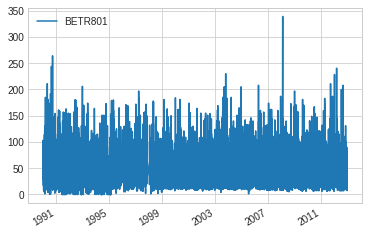

In [20]:
data_stacked.plot()

# Processing a collection of files

We now have seen the code steps to process one of the files. We have however multiple files for the different stations with the same structure. Therefore, to not have to repeat the actual code, let's make a function from the steps we have seen above.

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Write a function `read_airbase_file(filename, station)`, using the above steps the read in and process the data, and that returns a processed timeseries.</li>
</ul>
</div>

In [21]:
def read_airbase_file(filename, station):
    """
    Read hourly AirBase data files.
    
    Parameters
    ----------
    filename : string
        Path to the data file.
    station : string
        Name of the station.
       
    Returns
    -------
    DataFrame
        Processed dataframe.
    """
    
    ...
    
    return ...

In [22]:
def read_airbase_file(filename, station):
    """
    Read hourly AirBase data files.
    
    Parameters
    ----------
    filename : string
        Path to the data file.
    station : string
        Name of the station.
       
    Returns
    -------
    DataFrame
        Processed dataframe.
    """
    
    # construct the column names    
    hours = ["{:02d}".format(i) for i in range(24)]
    flags = ['flag' + str(i) for i in range(24)]
    colnames = ['date'] + [item for pair in zip(hours, flags) for item in pair]
    
    # read the actual data
    data = pd.read_csv(filename, sep='\t', header=None, na_values=[-999, -9999], names=colnames)
    
    # drop the 'flag' columns
    data = data.drop([col for col in data.columns if 'flag' in col], axis=1)

    # reshape
    data = data.set_index('date')
    data_stacked = data.stack()
    data_stacked = data_stacked.reset_index()
    
    # parse to datetime and remove redundant columns 
    data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['level_1'], format="%Y-%m-%d%H")
    data_stacked = data_stacked.drop(['date', 'level_1'], axis=1)
    data_stacked = data_stacked.rename(columns={0: station})
    
    return data_stacked

Test the function on the data file from above:

In [23]:
filename = "../data/BETR8010000800100hour.1-1-1990.31-12-2012"
station = filename.split("/")[-1][:7]

In [24]:
station

'BETR801'

In [25]:
test = read_airbase_file(filename, station)
test.head()

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


We now want to use this function to read in all the different data files from AirBase, and combine them into one Dataframe. 

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Use the `glob.glob` function to list all 4 AirBase data files that are included in the 'data' directory, and call the result `data_files`.</li>
</ul>
</div>

In [26]:
import glob

In [27]:
data_files = glob.glob("../data/*0008001*")
data_files

['../data/BETN0290000800100hour.1-1-1990.31-12-2012',
 '../data/FR040370000800100hour.1-1-1999.31-12-2012',
 '../data/BETR8010000800100hour.1-1-1990.31-12-2012',
 '../data/FR040120000800100hour.1-1-1999.31-12-2012']

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Loop over the data files, read and process the file using our defined function, and append the dataframe to a list.</li>
  <li>Combine the the different DataFrames in the list into a single DataFrame where the different columns are the different stations. Call the result `combined_data`.</li>

</ul>
</div>

In [28]:
dfs = []

for filename in data_files:
    station = filename.split("/")[-1][:7]
    df = read_airbase_file(filename, station)
    dfs.append(df)

In [29]:
combined_data = pd.concat(dfs, axis=1)

In [30]:
combined_data.head()

,BETN029,FR04037,BETR801,FR04012
1990-01-01 00:00:00,16.0,NaN,NaN,NaN
1990-01-01 01:00:00,18.0,NaN,NaN,NaN
1990-01-01 02:00:00,21.0,NaN,NaN,NaN
1990-01-01 03:00:00,26.0,NaN,NaN,NaN
1990-01-01 04:00:00,21.0,NaN,NaN,NaN


Finally, we don't want to have to repeat this each time we use the data. Therefore, let's save the processed data to a csv file.

In [31]:
# let's first give the index a descriptive name
combined_data.index.name = 'datetime'

In [32]:
combined_data.to_csv("../data/airbase_data.csv")